In [0]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib

In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [192]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1N7TE7M_agdALxC1DejTfPfNgVzMvEK9uhW0QT9EYKLo/edit')

In [0]:
sheet = wb.worksheet('products_tsa1.csv')

In [0]:
data = sheet.get_all_values()

In [0]:
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:]

In [197]:
df.head()

,dummy_date,family_id,sales
1,2019-01-05,15279677,34.0
2,2019-01-05,24133775,6.0
3,2019-01-05,26874355,142.0
4,2019-01-05,40561416,17.0
5,2019-01-05,51074127,69.0


In [198]:
df.dtypes

0
dummy_date    object
family_id     object
sales         object
dtype: object

In [0]:
df.dtypes
df.sales = df.sales.astype(float)
import datetime
df.dummy_date = pd.to_datetime(df.dummy_date)

In [200]:
products_final = df
products_final0 = products_final.groupby('dummy_date')['sales'].sum().reset_index()
products_final0 = products_final0.set_index('dummy_date')
products_final0.head()

,sales
dummy_date,
2019-01-05,30609.0
2019-01-06,29806.0
2019-01-07,28408.0
2019-01-08,30983.0
2019-01-09,40190.0


In [201]:

products_final0.tail()

,sales
dummy_date,
2019-04-02,33871.0
2019-04-03,51074.0
2019-04-04,45545.0
2019-04-05,41701.0
2019-04-06,38456.0


predicted=39857.849464, expected=35722.000000
predicted=41445.204578, expected=36167.000000
predicted=38001.673674, expected=35117.000000
predicted=31313.985976, expected=31853.000000
predicted=30693.314116, expected=33414.000000
predicted=32167.610286, expected=43753.000000
predicted=41574.559197, expected=44421.000000
predicted=46235.723862, expected=47876.000000
predicted=53359.077752, expected=51225.000000
predicted=56076.268649, expected=48811.000000
predicted=51549.086175, expected=81427.000000
predicted=81548.687432, expected=46766.000000
predicted=66037.273471, expected=52324.000000
predicted=59502.833798, expected=48282.000000
predicted=47234.265411, expected=45093.000000
predicted=32892.901213, expected=35989.000000
predicted=36696.295090, expected=40205.000000
predicted=33352.327839, expected=34802.000000
predicted=31081.225355, expected=33871.000000
predicted=30796.400786, expected=51074.000000
predicted=46604.820404, expected=45545.000000
predicted=49184.198750, expected=4

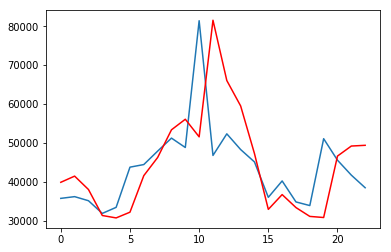

In [202]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
X = products_final0.values
size = int(len(X) * 0.75)   # Split percentage

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(3,2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [0]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1Sok7Me_MG3sTQ4ef1wZnwuCKyY1b0BxlxApVQNHWilw/edit#gid=1846687576')

In [0]:
sheet = wb.worksheet('products_tsa.csv')

In [0]:
data = sheet.get_all_values()

In [0]:
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:]

In [207]:
products_final_prod = df
products_final_prod.head()

,dummy_date,product_id,sales
1,2019-01-05,310130,11.0
2,2019-01-05,1178388,0.0
3,2019-01-05,1561460,7.0
4,2019-01-05,1874414,4.0
5,2019-01-05,2436420,0.0


In [0]:
products_final_prod.dummy_date = pd.to_datetime(products_final_prod['dummy_date'])

In [0]:
products_final_prod.product_id.value_counts()
products_selectd = products_final_prod[products_final_prod['product_id'] == '898764781']

In [210]:
products_selectd = products_selectd.set_index('dummy_date')
products_selectd = products_selectd.drop(columns='product_id')
products_selectd.head()

,sales
dummy_date,
2019-01-05,8.0
2019-01-06,9.0
2019-01-07,7.0
2019-01-08,9.0
2019-01-09,8.0


In [211]:
92-23

69

In [0]:
rolmean = products_selectd.rolling(window=7).mean()

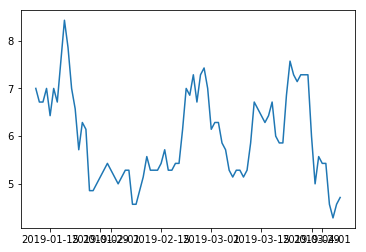

In [213]:
plt.plot(rolmean)

In [0]:
test = products_selectd[73:]
train = products_selectd[:73]


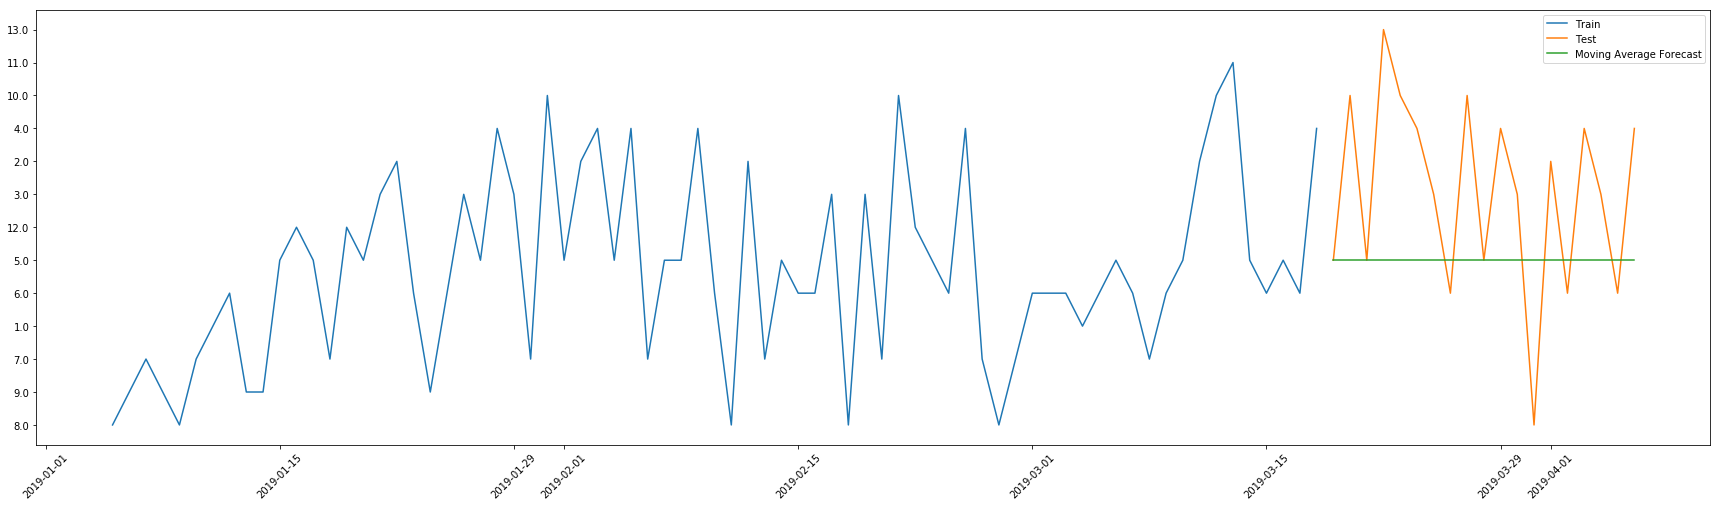

In [215]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['sales'].rolling(window = 3).median().iloc[-1]
plt.figure(figsize=(30,8))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.



In [0]:
rms_dict = {} 

In [217]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms_moving_avg = sqrt(mean_squared_error(test.sales, y_hat_avg.moving_avg_forecast))
print(rms_moving_avg)
rms_dict['rms_moving_avg'] = rms_moving_avg

3.0435436410107286


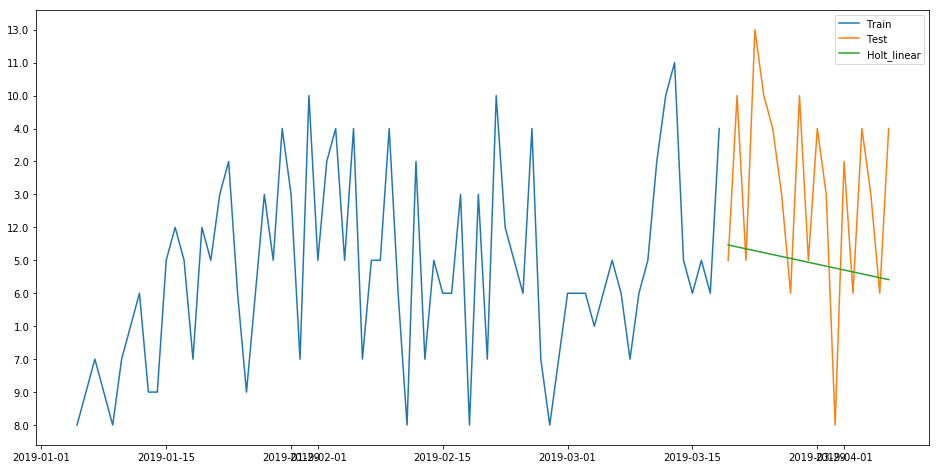

In [218]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['sales'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [219]:
rms_holt = sqrt(mean_squared_error(test.sales, y_hat_avg.Holt_linear))
print(rms_holt)
rms_dict['holt'] = rms_holt

2.9404370974078198


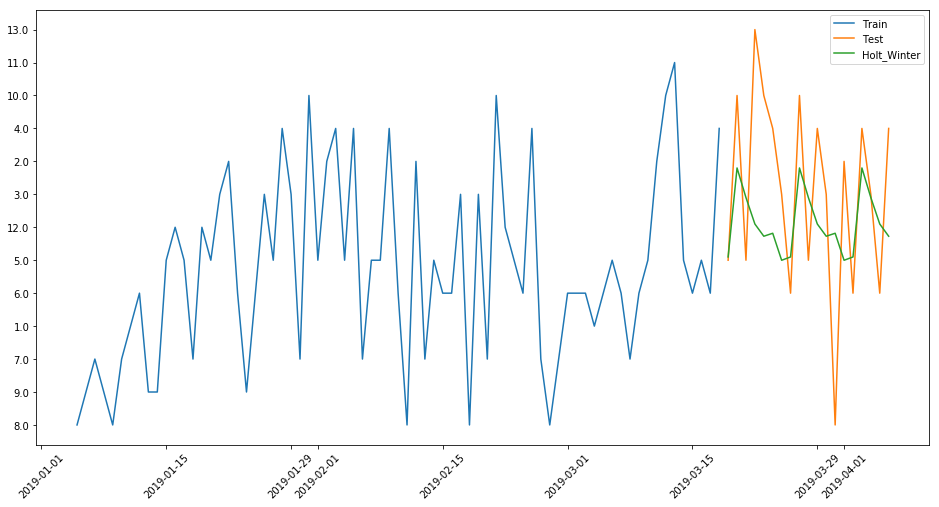

In [233]:
from google.colab import files


y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['sales']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.xticks(rotation=45)
plt.legend(loc='best')
#plt.show()

plt.savefig('forecast.png')
files.download('forecast.png')


In [221]:
rms_holt_winter = sqrt(mean_squared_error(test.sales, y_hat_avg.Holt_Winter))
print(rms_holt_winter)
rms_dict['rms_holt_winter'] = rms_holt_winter

2.8094320924395553


In [222]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


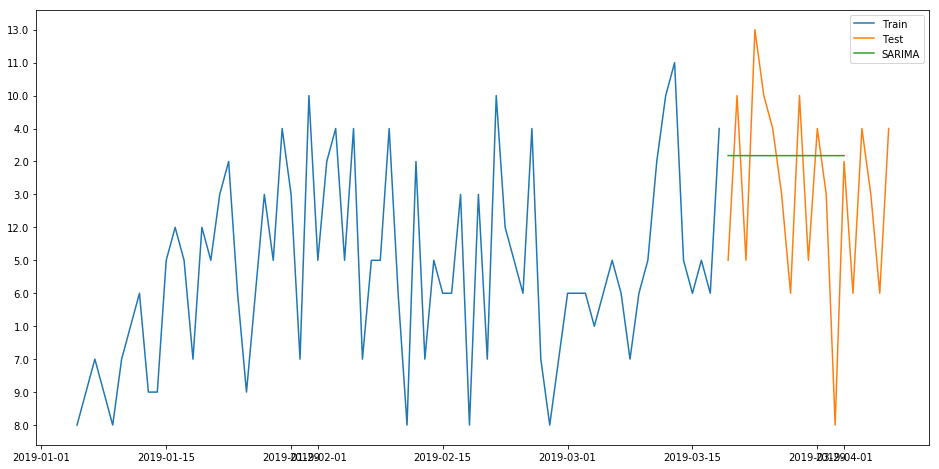

In [223]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.sales.astype(float), order=(2, 1, 4)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2019-01-10", end="2019-04-01", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [224]:
best_alg = min(rms_dict, key=rms_dict.get)
print (f'The best learning algorithm for this dataset is {best_alg}, which has an accuracy of {rms_dict.get(best_alg)}%.')

The best learning algorithm for this dataset is rms_holt_winter, which has an accuracy of 2.8094320924395553%.
